In [28]:
import os

# Ignore numpy warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
#%matplotlib notebook

# Use seaborn settings.
import seaborn as sns
sns.set(
        #context="paper",
        context="talk",
        #context="poster",
        style='darkgrid',
        #style="dark",
        #palette='deep',
        font='sans-serif', 
        #font_scale=1.0, 
        #color_codes=False, 
        rc={'figure.figsize': (12, 8.0)}, # width and height in inches.
)

import IPython

def _embed(src, width="800", height="400"):
    return IPython.display.IFrame(src=src, width=str(width), height=str(height))

from IPython.core.magic import (register_line_magic, register_cell_magic,
                                register_line_cell_magic)

@register_line_magic
def embed(line):
    "my line magic"
    #return line
    return _embed(line)


# We delete these to avoid name conflicts for automagic to work
del embed
#del lcmagic

# Theme
# import jtplot module in notebook
#from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
#jtplot.style(theme='monokai')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
#jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
#jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
#jtplot.reset()

from abipy import abilab
import abipy.data as abidata

si_pseudo = os.path.join(abidata.pseudo_dir, "14si.pspnc")

# New features of AbiPy v0.7

### M. Giantomassi and the AbiPy group

Boston MA, 3 March 2019

<!-- link rel="stylesheet" href="reveal.js/css/theme/sky.css" id="theme" -->

<img src="./assets/intro_logos.png" width="85%" heigh="15%" align="center">

<hr> 

* These slides have been generated using [jupyter](https://jupyter.org), [nbconvert](https://github.com/jupyter/nbconvert) and [revealjs](https://revealjs.com/)

* The notebook can be downloaded from this [github repo](https://github.com/gmatteo/abipy_slides_aps_boston_2019)

* To install and configure the software, follow these [installation instructions](https://github.com/abinit/abipy#getting-abipy)


<img src="./assets/abipy_logo.jpg" width="55%" align="center">
<!-- img src="./assets/abinit_logo.jpg" width="45%" align="right"-->

## What is AbiPy?

#### Python package for:

   * Generating ABINIT input files automatically
   * Post-processing output results (*netcdf* and *text* files)
   * Interfacing ABINIT with external tools (e.g. [Vesta](http://jp-minerals.org/vesta/en/))
   * Creating and executing workflows (band structures, phonons, $GW$…)
   
#### Project:

* Developed and maintained by the ABINIT community
* Used by developers to validate, profile and optimize ABINIT
* Hosted on [github](https://github.com/abinit/abipy) 
* Release under the GPLv2 license

## Why python?

   * Easy to use and to learn
   * Great support for science ([numpy](http://www.numpy.org/), [scipy](https://www.scipy.org/), [pandas](http://pandas.pydata.org/), [matplotlib](https://matplotlib.org/) …)
   * Interactive environments ([ipython](http://ipython.org/), [jupyter notebooks](https://jupyter.org/), GUIs)
   * More powerful and flexible than Fortran for implementing the high-level logic needed in modern ab-initio workflows
   * [pymatgen](https://github.com/materialsproject) ecosystem and the [materials project database](https://www.materialsproject.org/)…
   
<img src="./assets/pydata_stack.png" width="65%" align="center">

## AbiPy design principles

* Extend the pymatgen code-base with ABINIT-specific objects
* Layered structure designed for different use-cases:
        
     * Post-processing tools and command-line interfaces
     * API to automate calculations and data analysis
     * High-throughput infrastructure ([abiflows](https://github.com/abinit/abiflows), [fireworks](https://github.com/materialsproject/fireworks), [mongodb](https://www.mongodb.com/))
     
* Closely connected to the ABINIT executable:

    * CPU-intensive algorithms performed by ABINIT (Fortran + MPI + OpenMP)
    * Glue code implemented in python
   
* ABINIT and AbiPy communicate through [netcdf](https://www.unidata.ucar.edu/software/netcdf/docs/) files

    * Portable binary format implemented in C
    * Fortran/Python bindings and support for parallel MPI-IO (HDF5)
    * [ETSF-IO specifications](https://www.etsf.eu/fileformats) for crystalline structures, wavefunctions, densities…

## How to install AbiPy

<!-- From the most simple to the most complex one, you have three options:-->

Using [pip](https://pypi.org/project/pip/) and python wheels:

        pip install abipy --user

Using [conda](https://conda.io/en/latest/) (*recommended*):

        conda install abipy --channel abinit 

From the [github repository](https://github.com/abinit/abipy) (*develop mode*):

        git clone https://github.com/abinit/abipy.git
        cd abipy 
        python setup.py develop
    
<!--
https://pypi.org/project/abipy/
https://anaconda.org/abinit/abipy
-->

<hr>

For further info see http://abinit.github.io/abipy/installation.html

## AbiPy documentation

<!--
* http://abinit.github.io/abipy/index.html

* Jupyter notebooks 
* Gallery of matplotlib examples and flows
* abitutorial github repo with additional examples


<img src="./assets/abipy_doc_homepage.png" width="100%" align="center">
-->

In [29]:
%embed https://abinit.github.io/abipy/index.html

##  Jupyter notebooks with [examples and lessons](https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/index.ipynb) 

<!-- img src="./assets/abipy_notebooks.png" width="100%" align="center" -->

In [30]:
%embed https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/index.ipynb

## Other files supported by AbiPy

* *GSR.nc* ➝ Ground-state results produced by SCF/NSCF runs
* *HIST.nc* ➝ Structural relaxation and molecular dynamics
* *FATBANDS.nc* ➝ Fatbands and LM-projected DOS for electrons
* *DDB*: ➝ dynamical matrix, Born effective charges, elastic constants…
* *SIGRES.nc* ➝ $GW$ calculations ($\Sigma^{e-e}$ self-energy)
* *MDF.nc* ➝ Bethe-Salpeter calculations
* *ABIWAN.nc* ➝ *netcdf* file produced by Abinit with wannier90 results 
* *SIGEPH.nc* ➝ electron-phonon self-energy ($\Sigma^{e-ph}$)
* …

#### Jupter notebooks with examples available  [here](https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/index.ipynb#Output-files-supported-by-AbiPy)

<img src="./assets/Data-Analysis.jpg" width="95%" align="center">

## Command Line Interface

<img src="./assets/python_cli.jpg" width="85%" align="center">

## AbiPy post-processing tools

* Main entry point: 

  ```python
       from abipy import abilab
  abifile = abilab.abiopen("filename.nc")
  ```
        
  where *filename.nc* is a *netcdf* file (support also text files e.g. *run.abo*, *run.log*, *out_DDB*)

* *abifile* is the *AbiFile* subclass associated to the given file extension:

    1. GSR.nc ➝ *GsrFile*
    2. HIST.nc ➝ *HistFile*
    3. More than 45 file extensions supported (see `abiopen.py --help`) 
    

* Command line interface: use `abiopen.py FILE` to:

     * open the file inside the [*ipython*](https://ipython.org/) terminal
     * print info to terminal (`--print` option)
     * produce a predefined set of *matplotlib*  figures (`--expose` option)
     * generate [jupyter notebooks](https://jupyter.org/) (`--notebook` option)

## Command line interface

    
* *abistruct.py* ➝ Operate on crystalline structures read from file
* *abiopen.py* ➝ Open output files inside Ipython session
* *abicomp.py* ➝ Compare multiple files (convergence studies)
* *abiview.py* ➝ Quick visualization of output files
* *abinp.py* ➝ Generate input files for typical calculations
    

Use e.g. 

* `abistruct.py --help` for manpage
* `abistruct.py COMMAND --help` for help about `COMMAND`

<hr>

HTML documentation available at http://abinit.github.io/abipy/scripts/index.html

### Examples

```shell
abistruct.py spglib si_scf_GSR.nc
abistruct.py convert si_scf_GSR.nc -f cif
abiopen.py si_scf_GSR.nc --print
```

#### Print results of ground-state calculations 

In [31]:
!abiopen.py si_scf_GSR.nc --print

================================= File Info =================================
Name: si_scf_GSR.nc
Directory: /Users/gmatteo/talks/abipy_intro_abidev2019
Size: 14.83 kb
Access Time: Mon May 13 01:15:03 2019
Modification Time: Sun May 12 04:20:35 2019
Change Time: Sun May 12 04:20:35 2019

================================= Structure =================================
Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c  cartesian_forces
---  ----  ----  ----  ----  -----------------------------------------------------------
  0  Si    0     0     0     [-5.89948302e-27 -1.93366148e-27  2.91016902e-27] eV ang^-1
  1  Si    0.25  0.25  0.25  [ 5.89948302e-27  1.93366148e-27 -2.91016902e-27] eV ang^-1

Abinit Spacegroup: spgid: 227, num_spatial_symmetries: 48, has_timerev: True, symmorphic: True

Stress tensor (Cartesian coordinates in GPa):
[[5.21161758e+00 7.86452261e-11 0.00000000e+00

#### To produce a predefined set of matplotlib figures, use:


```shell
abiopen.py si_nscf_GSR.nc --expose
```    
    
<br>
<img src="assets/abiopen_expose.png" width="75%" align="center" alt="abiopen_expose">

#### Convert structure from netcdf format to CIF

In [32]:
!abistruct.py convert si_scf_GSR.nc -f cif

# generated using pymatgen
data_Si
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   3.86697464
_cell_length_b   3.86697464
_cell_length_c   3.86697464
_cell_angle_alpha   60.00000000
_cell_angle_beta   60.00000000
_cell_angle_gamma   60.00000000
_symmetry_Int_Tables_number   1
_chemical_formula_structural   Si
_chemical_formula_sum   Si2
_cell_volume   40.88829228
_cell_formula_units_Z   2
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Si  Si1  1  0.000000  0.000000  0.000000  1
  Si  Si2  1  0.250000  0.250000  0.250000  1



#### Read structure from FILE and use [spglib](https://atztogo.github.io/spglib/) to analyze symmetries

In [33]:
!abistruct.py spglib si_scf_GSR.nc

Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000

Spglib space group info (magnetic symmetries not taken into account).
Spacegroup: Fd-3m (227), Hall: F 4d 2 3 -1d, Abinit spg_number: 227
Crystal_system: cubic, Lattice_type: cubic, Point_group: m-3m

  Idx  Symbol    Reduced_Coords              Wyckoff      EqIdx
-----  --------  --------------------------  ---------  -------
    0  Si        +0.00000 +0.00000 +0.00000  (2a)             0
    1  Si        +0.25000 +0.25000 +0.25000  (2a)             0


#### It works with any file providing a structure object (*.nc*, .abi, *.cif* …) 

#### Connect to the materials project database. Get structures corresponding to a chemical system or formula e.g. `Fe2O3` or `Li-Fe-O` or `Ir-O-*` for wildcard pattern matching.

<!--
Print info and Abinit input files. Use e.g. `-f POSCAR`
to change output format. `-f None` to disable structure output.
-->

In [34]:
!abistruct.py mp_match si_scf_GSR.nc

/Users/gmatteo/git_repos/pymatgen/pymatgen/ext/matproj.py:115: UserWarning: Non-default endpoint used: https://www.materialsproject.org/rest/v2
  warnings.warn("Non-default endpoint used: {}".format(self.preamble))
/Users/gmatteo/git_repos/pymatgen/pymatgen/ext/matproj.py:115: UserWarning: Non-default endpoint used: https://www.materialsproject.org/rest/v2
  warnings.warn("Non-default endpoint used: {}".format(self.preamble))

# Found 1 structures in Materials Project database (use `verbose` to get further info)

 
########################## abivars input for mp-149 ##########################
# Full Formula (Si2)
# Reduced Formula: Si
# abc   :   3.866975   3.866975   3.866975
# angles:  60.000000  60.000000  60.000000
# 
# Spglib space group info (magnetic symmetries not taken into account).
# Spacegroup: Fd-3m (227), Hall: F 4d 2 3 -1d, Abinit spg_number: None
# Crystal_system: cubic, Lattice_type: cubic, Point_group: m-3m
# 
#   Idx  Symbol    Reduced_Coords              Wyckoff    

In [35]:
#!abistruct.py mp_search LiF

In [36]:
from abipy import abilab
import abipy.data as abidata

In [37]:
gsr_kpath = abilab.abiopen("si_nscf_GSR.nc")

#### This function returns an *AbiFile* object provinding access to physical properties.

Conventions:

   * *abifile.structure* ➝ crystalline structure (subclass of pymatgen *Structure*)
   * *abifile.ebands* ➝ electron band energies
   * *abifile.ebands.kpoints* ➝ list of k-points (k-path, IBZ) 
   * *abifile.phbands* ➝ phonon frequencies and displacements
   
Several AbiPy objects provide *plot* methods returning [*matplotlib*](https://matplotlib.org/) figures

#### Use *ElectronBandsPlotter* to visualize multiple band structures:

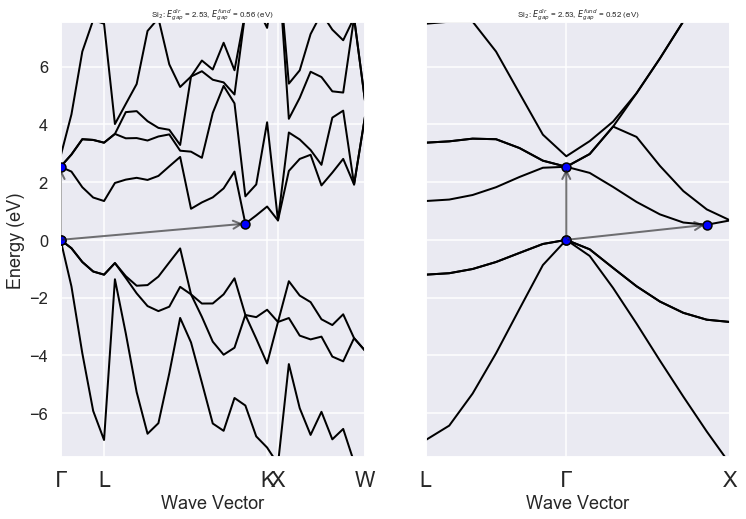

In [38]:
plotter = abilab.ElectronBandsPlotter()
plotter.add_ebands(label="BZ sampling", bands="si_scf_GSR.nc")
plotter.add_ebands(label="k-path", bands="si_nscf_GSR.nc")
plotter.gridplot(with_gaps=True);

## Abipy Robots

* High-level interface to operate on <u>multiple files</u> with the same file extension

* Useful for:

     * convergence studies
     * producing multiple plots
     * building [Pandas dataframes](https://pandas.pydata.org/) (data in tabular format powered by python)

* Each *Robot* is associated to a file extension, *e.g.* 

     * GSR.nc ➝ *GsrRobot*
     * DDB ➝ *DdbRobot*
     
* *Robots* can be constructed from:

    1. List of filenames
    2. Directories and regular expressions
    
* Command line interface provided by the *abicomp.py* script:

* To generate notebook to compare multiple *GSR* files, use:

            abicomp.py gsr out1_GSR.nc  out2_GSR.nc --notebook

## Our first example with the GsrRobot

#### We have a directory with a bunch of  *GSR.nc* files and we need to analyze the results:

#### Jupyter knows how to visualize *DataFrames*:

* Dataframes can be exported to different formats: CSV, $Latex$, JSON, Excel, ...
* High-level plotting interface provided by [seaborn](https://seaborn.pydata.org/)
* Explore your *DataFrames* inside *jupyter* with [qgrid](https://github.com/quantopian/qgrid)
* Use [ene_table.to_clipboard()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_clipboard.html#pandas-dataframe-to-clipboard) 
to copy to clipboard and paste into spreadsheet editor


* Command line interface provided by the [abicomp.py script](https://abinit.github.io/abipy/scripts/abicomp.html) 

* See also [lesson_base3](https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/base3/lesson_base3.ipynb:)

### Post-processing the DFPT results available in the MP database

* More than 1500 DFPT calculations done with abiflows ([Petretto et al.](https://www.nature.com/articles/sdata201865))
* Results available on the materials project website (including the *DDB* files) 

<hr>

Let's assume we want to reuse the raw data for our research work:

   * Handling 1500 tabs in the web browser is not feasible
   * We need a <u>programmatic</u> interface to automate stuff. 

With python we can easily connect the different parts of the puzzle:

* REST API to get the raw data (*DDB*) from the MP database
* Computation of phonons, thermodinamical properties, Born effective charges, dielectric tensor, IR spectrum with ABINIT
* Post-processing with AbiPy

For a more comprehensive discussion see this 
[abitutorial](https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/ddb.ipynb)

<!--
The results for the rocksalt phase of MgO are available at https://materialsproject.org/materials/mp-1009129/
-->

#### To download a DDB file from the materials project database:

In [39]:
ddb = abilab.DdbFile.from_mpid("mp-1009129")
print(ddb)

================================= File Info =================================
Name: mp-1009129ze_fcfj3_DDB
Directory: /var/folders/nc/k69spyd12qv2tk3stk2xrxg40000gr/T
Size: 218.73 kb
Access Time: Mon May 13 01:15:20 2019
Modification Time: Mon May 13 01:15:20 2019
Change Time: Mon May 13 01:15:20 2019

================================= Structure =================================
Full Formula (Mg1 O1)
Reduced Formula: MgO
abc   :   2.908638   2.908638   2.656848
angles:  90.000000  90.000000 120.000000
Sites (2)
  #  SP           a         b    c
---  ----  --------  --------  ---
  0  Mg    0         0         0
  1  O     0.333333  0.666667  0.5

Abinit Spacegroup: spgid: 0, num_spatial_symmetries: 12, has_timerev: True, symmorphic: False

================================== DDB Info ==================================

Number of q-points in DDB: 72
guessed_ngqpt: [ 9  9 10] (guess for the q-mesh divisions made by AbiPy)
ecut = 44.000000, ecutsm = 0.000000, nkpt = 405, nsym = 12, usepaw

#### Once we have a *DdbFile* object, we can call *anaddb* to compute phonon bands and DOS:

In [40]:
# Return PHBST and PHDOS netcdf files.
phbstnc, phdosnc = ddb.anaget_phbst_and_phdos_files(
    ndivsm=20, nqsmall=20, lo_to_splitting=True, asr=2, 
    chneut=1, dipdip=1, dos_method="tetra")

#### and extract the phonon bands and the phonon DOS objects with:

In [41]:
phbands = phbstnc.phbands
phdos = phdosnc.phdos

In [42]:
print(phbands)

================================= Structure =================================
Full Formula (Mg1 O1)
Reduced Formula: MgO
abc   :   2.908638   2.908638   2.656848
angles:  90.000000  90.000000 120.000000
Sites (2)
  #  SP           a         b    c
---  ----  --------  --------  ---
  0  Mg    0         0         0
  1  O     0.333333  0.666667  0.5

Abinit Spacegroup: spgid: 0, num_spatial_symmetries: 12, has_timerev: True, symmorphic: False

Number of q-points: 345
Atomic mass units: {12.0: 24.305, 8.0: 15.9994}
Has non-analytical contribution for q --> 0: True


#### To plot the q-path:

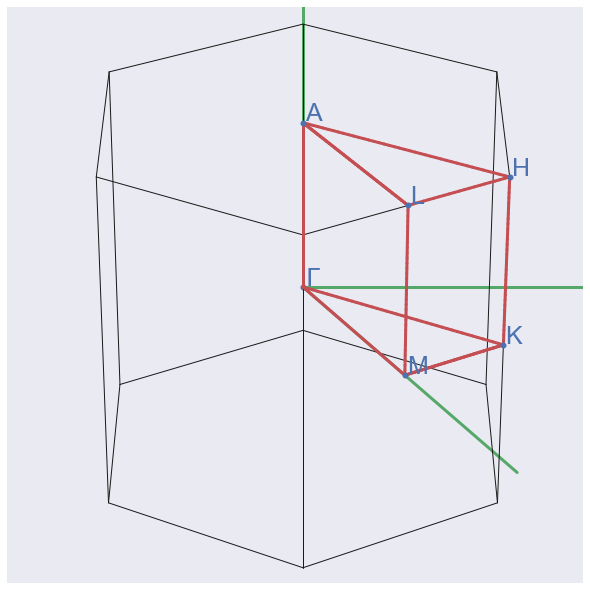

In [43]:
phbands.qpoints.plot();

#### To plot the phonon band structure including LO-TO splitting:

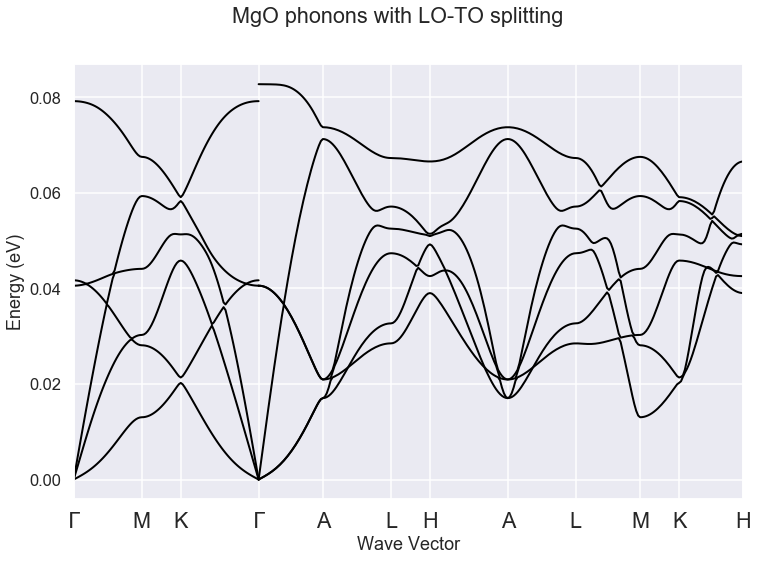

In [44]:
phbands.plot(title="MgO phonons with LO-TO splitting");

#### We can also plot the phonon bands and the DOS on the same figure with:

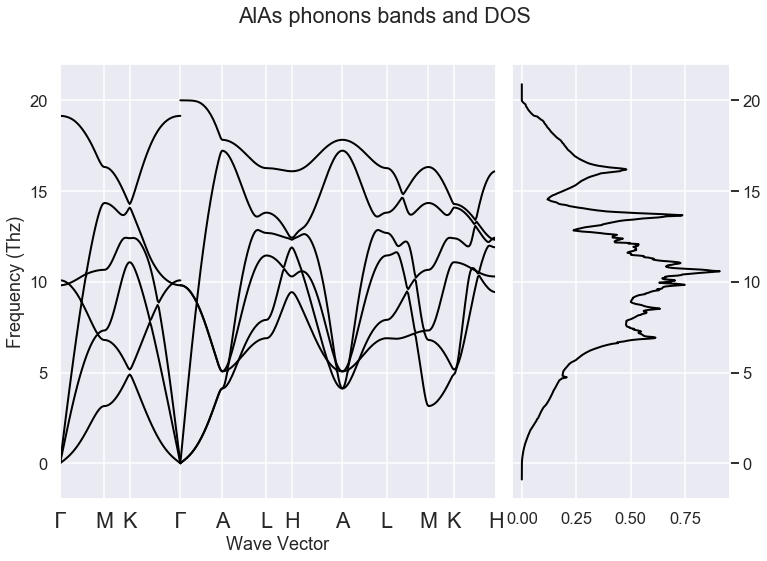

In [45]:
phbands.plot_with_phdos(phdos, units="Thz", title="AlAs phonons bands and DOS");

## How to use DdbRobot to perform convergence studies

<!--
We have performed DFPT calculations for a metallic system ($MgB_2$) and we 
are interested in the effect of the k-sampling and the smearing on the vibrational properties.
-->
##### Let's use the *DdbRobot* to compare phonons obtained with different k-meshes and smearing values:

In [46]:
paths = [
    "mgb2_888k_0.01tsmear_DDB",
    "mgb2_888k_0.04tsmear_DDB",
    "mgb2_121212k_0.01tsmear_DDB",
    "mgb2_121212k_0.04tsmear_DDB",
]

paths = [os.path.join(abidata.dirpath, "refs", "mgb2_phonons_nkpt_tsmear", f) 
         for f in paths]

robot = abilab.DdbRobot()
for i, path in enumerate(paths):
    robot.add_file(path, path)

In [47]:
# Define function to change labels:
func = lambda ddb: "nkpt: %s, tsmear: %.2f" % (
    ddb.header["nkpt"], ddb.header["tsmear"])

robot.remap_labels(func)
robot

Label                    Relpath
-----------------------  ------------------------------------------------------------------------------------------
nkpt: 256, tsmear: 0.01  ../../git_repos/abipy/abipy/data/refs/mgb2_phonons_nkpt_tsmear/mgb2_888k_0.01tsmear_DDB
nkpt: 256, tsmear: 0.04  ../../git_repos/abipy/abipy/data/refs/mgb2_phonons_nkpt_tsmear/mgb2_888k_0.04tsmear_DDB
nkpt: 864, tsmear: 0.01  ../../git_repos/abipy/abipy/data/refs/mgb2_phonons_nkpt_tsmear/mgb2_121212k_0.01tsmear_DDB
nkpt: 864, tsmear: 0.04  ../../git_repos/abipy/abipy/data/refs/mgb2_phonons_nkpt_tsmear/mgb2_121212k_0.04tsmear_DDB

<!-- We are usually interested in the convergence behavior with respect to one or two parameters of 
the calculations.-->

#### Now we can build a dataframe with the most important parameters:

In [48]:
robot.get_params_dataframe()

,nkpt,nsppol,ecut,tsmear,occopt,ixc,nband,usepaw
"nkpt: 256, tsmear: 0.01",256,1,35.0,0.01,4,1,8,0
"nkpt: 256, tsmear: 0.04",256,1,35.0,0.04,4,1,8,0
"nkpt: 864, tsmear: 0.01",864,1,35.0,0.01,4,1,8,0
"nkpt: 864, tsmear: 0.04",864,1,35.0,0.04,4,1,8,0


#### and check that all DDBs have been computed with the same crystalline structure:

In [49]:
robot.get_lattice_dataframe()

,formula,natom,alpha,beta,gamma,a,b,c,volume,abispg_num,spglib_symb,spglib_num,spglib_lattice_type
"nkpt: 256, tsmear: 0.01",Mg1 B2,3,90.0,90.0,120.0,3.086,3.086,3.523,29.055953,0,P6/mmm,191,hexagonal
"nkpt: 256, tsmear: 0.04",Mg1 B2,3,90.0,90.0,120.0,3.086,3.086,3.523,29.055953,0,P6/mmm,191,hexagonal
"nkpt: 864, tsmear: 0.01",Mg1 B2,3,90.0,90.0,120.0,3.086,3.086,3.523,29.055953,0,P6/mmm,191,hexagonal
"nkpt: 864, tsmear: 0.04",Mg1 B2,3,90.0,90.0,120.0,3.086,3.086,3.523,29.055953,0,P6/mmm,191,hexagonal


#### To analyze the effect of the k-sampling and of the smearing on the vibrational properties:

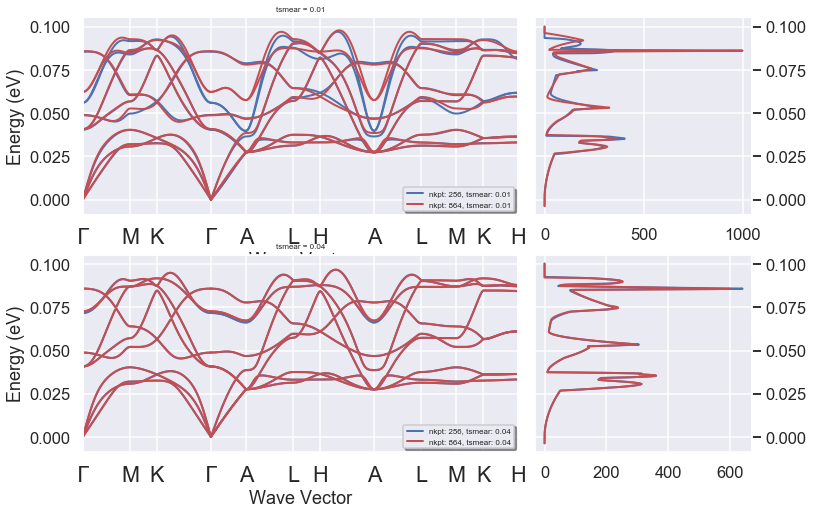

In [50]:
# Invoke anaddb and store results
r = robot.anaget_phonon_plotters(nqsmall=2)

r.phbands_plotter.gridplot_with_hue("tsmear", with_dos=True);

#### Python code to visualize electronic and vibrational properties from the MP database:

In [51]:
def plot_electrons_and_phonons(mpids):
    # Construct AbiPy ebands from mpids
    ebands_list = [abilab.ElectronBands.from_mpid(mpid) for mpid in mpids]

    # Get DDB files from the MP website and run anaddb to get phonon bands.
    phbands_list = []
    for i, mpid in enumerate(mpids):
        ddb = abilab.DdbFile.from_mpid(mpid)
        # Call anaddb to compute phonon bands
        phbst, _ = ddb.anaget_phbst_and_phdos_files(nqsmall=0)
        phbands_list.append(phbst.phbands)
        phbst.close()

    # Build matplotlib grid. The figure has (len(mpids), 2) subplots
    nrows, ncols = len(mpids), 2
    ax_mat, fig, plt = abilab.get_axarray_fig_plt(None, nrows=nrows, ncols=ncols,
                                                  sharex=False, sharey=False, 
                                                  squeeze=False)
    
    for i, (ebands, phbands) in enumerate(zip(ebands_list, phbands_list)):
        ebands.plot(ax=ax_mat[i, 0], with_gaps=True, ylims=(-5, 10), 
                    max_phfreq=phbands.maxfreq, show=False)
        phbands.plot(ax=ax_mat[i, 1], show=False)
        
        # Hide labels
        ax_mat[i, 1].yaxis.label.set_visible(False)
        if i != len(ebands_list) - 1:
            for ax in ax_mat[i]: ax.xaxis.label.set_visible(False)

    return fig

Structure object does not have symmetry operations computed from Abinit.
Calling spglib to get symmetry operations.
Structure object does not have symmetry operations computed from Abinit.
Calling spglib to get symmetry operations.


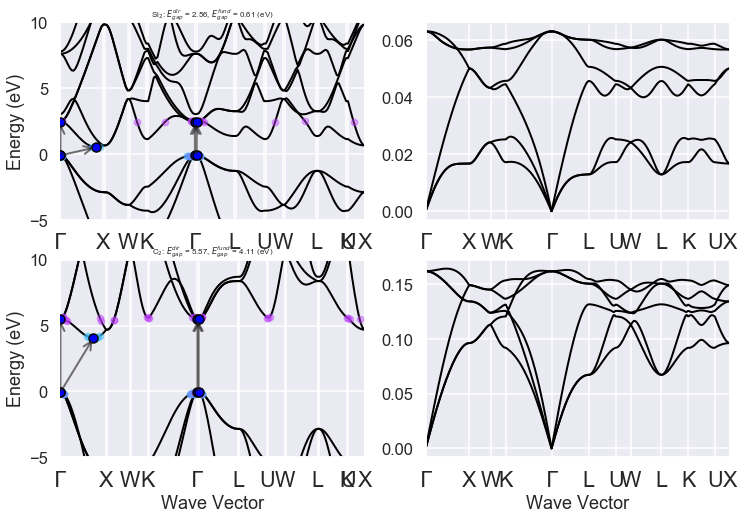

In [52]:
plot_electrons_and_phonons(mpids=["mp-149", "mp-66"]); # Si and Diamond

##### Qualitative analysis of possible e-ph scattering channels with less than 20 lines of code!

# How to automate input file generation with AbiPy

<img src="./assets/automate_input_files.jpg" width="85%" align="center">

## *AbinitInput* object 

Programmatic interface to generate input files:

* *Dict-like* object storing ABINIT variables 
* Methods to set multiple variables (*e.g.* **k**-path from *structure*)
* Factory functions to generate input files with minimal effort

Can invoke ABINIT to get important parameters such as:

  * list of **k**-points in the IBZ
  * list of irreducible DFPT perturbations
  * list of possible configurations for MPI jobs (*npkpt*, *npfft*, *npband* …)
     
#### To build an input, we need a *structure* and a list of *pseudos*:

In [53]:
inp = abilab.AbinitInput(structure="si.cif", pseudos="14si.pspnc")

In [54]:
#from pseudo_dojo.core.pseudos import OfficialDojoTable
#pseudo_table = OfficialDojoTable.from_dojodir('ONCVPSP-PBEsol-PDv0.4','standard')

#### Inside the notebook, one gets the HTML representation with links to the documentation:

#### To generate a high-symmetry k-path (taken from an internal database)

In [55]:
inp.set_kpath(ndivsm=10)

{'kptbounds': array([[0.   , 0.   , 0.   ],
        [0.5  , 0.   , 0.5  ],
        [0.5  , 0.25 , 0.75 ],
        [0.375, 0.375, 0.75 ],
        [0.   , 0.   , 0.   ],
        [0.5  , 0.5  , 0.5  ],
        [0.625, 0.25 , 0.625],
        [0.5  , 0.25 , 0.75 ],
        [0.5  , 0.5  , 0.5  ],
        [0.375, 0.375, 0.75 ],
        [0.625, 0.25 , 0.625],
        [0.5  , 0.   , 0.5  ]]), 'kptopt': -11, 'ndivsm': 10, 'iscf': -2}

* Ten points to sample the smallest segment of the **k**-path
* Other segments are sampled so that proportions are preserved

### Inside jupyter, one can get the HTML documentation with:

## Interfacing Abinit with Python via *AbinitInput*

* Once we have an *AbinitInput*, it is possible to execute Abinit to:

    * get useful information from the Fortran code (e.g. IBZ, space group…)
    * validate the input file before running the calculation 
        
* Methods invoking Abinit start with the *abi* prefix followed by a verb: 

    * *inp.abiget_irred_phperts(...)* 
    * *inp.abivalidate()*

#### Important: 

* To call Abinit from AbiPy, one has to prepare a configuration file (*manager.yml*)
  providing all the information required to execute/submit Abinit jobs: 

     * `$PATH`, `$LD_LIBRARY_PATH`
     * modules
     * python environment


* For futher info consult the [documentation](https://abinit.github.io/abipy/workflows/taskmanager.html)



#### To get the list of k-points in the IBZ as computed by Abinit:

* DFPT perturbations are independent hence jobs can be executed in parallel
* These methods represent the **building block** to generate workflows at runtime.

## Multiple Datasets

* List of *AbinitInput* objects
* A handy tool to generate multiple input files with common variables:
     
    * Convergence studies (same structure, different *ngkpt*, *tsmear* …)
    * Input files for calculations requiring multiple steps (DFPT, $GW$)

#### Let's build a *MultiDataset* containing two datasets:

In [56]:
multi = abilab.MultiDataset(structure="si.cif", pseudos="14si.pspnc", ndtset=2)

multi.set_vars(ecut=4);

## Factory functions for typical calculations

* Functions returning *AbinitInput* or *MultiDataset* depending on the calculation type
* Minimal input from user:

     * *structure* object or file providing it
     * list of *pseudos*
     * *metavariables* e.g. *kppra* for the BZ sampling
     
* Default values designed to cover the most common scenarios
* Less flexible than the low-level API but easier to use
* Optional arguments to change the default behaviour (smearing="gaussian:0.1 eV")
* For a command line interface, use the *abinp.py* script.

#### To build an input for SCF+NSCF run with (relaxed) structure from the materials project database:


        abinp.py ebands mp-149 


### Some examples...

### Input file for band structure calculation + DOS

1. GS run to get the density 
2. NSCF run along high-symmetry **k**-path
3. NSCF run with **k**-mesh to compute the DOS

In [57]:
multi = abilab.ebands_input(structure="si.cif", 
                            pseudos="14si.pspnc",
                            ecut=8, 
                            spin_mode="unpolarized", 
                            smearing=None, 
                            dos_kppa=5000)

multi.get_vars_dataframe("kptopt", "iscf", "ngkpt")

,kptopt,iscf,ngkpt
dataset 0,1,None,"[8, 8, 8]"
dataset 1,-11,-2,None
dataset 2,1,-2,"[14, 14, 14]"


#### To build an input for SCF+NSCF run with (relaxed) structure from the materials project database:


        abinp.py ebands mp-149          

#### $GW$ calculations with the plasmon-pole model. The calculation consists of:

1. GS run to compute the density 
2. nscf-run to produce a WFK file with *nscf_nband* states
3. Input files to compute the screening ($W$) and the self-energy ($\Sigma^{e-e} = GW$)

In [58]:
multi = abilab.g0w0_with_ppmodel_inputs(
    structure="si.cif", pseudos="14si.pspnc", 
    kppa=1000, nscf_nband=50, ecuteps=2, ecutsigx=4, ecut=8, 
    spin_mode="unpolarized")

multi.get_vars_dataframe("optdriver", "ngkpt", "nband", "ecuteps", "ecutsigx")

,optdriver,ngkpt,nband,ecuteps,ecutsigx
dataset 0,None,"[8, 8, 8]",14,None,None
dataset 1,None,"[8, 8, 8]",50,None,None
dataset 2,3,"[8, 8, 8]",50,2,None
dataset 3,4,"[8, 8, 8]",50,2,4


* *nscf_nband*  ➝ number of bands in $GW$ (occ + empty)
* *ecuteps* ➝ planewave cutoff for $W_{G, G'}$ in Hartree 
* *ecutsigx* ➝ cutoff energy for the exchange part $\Sigma_x$
* *kppa* ➝ k-point sampling (#kpts per reciprocal atom)

### Interpolating $GW$ corrections with AbiPy

We can only compute QP energies for k-points belonging to the k-mesh of the input WFK file while we usually discuss electronic properties in terms of band energies along a high-symmetry k-path. 

Here we use the Fourier interpolation scheme proposed by Shankland-Koelling-Wood (SKW) in PRB 38 2721. The idea is relatively simple: the QP corrections have the same symmetry of the KS energies, we can thus interpolate the QP corrections with SKW and then apply the interpolated corrections to the ab-initio KS energies obtained along a path.

sigres = abilab.abiopen("flow_g0w0/w1/t2/outdata/out_SIGRES.nc")

It's just a matter of passing the KS band structure to the sigres.interpolate method to activate this procedure:

r = sigres.interpolate(lpratio=5, ks_ebands_kpath=ks_ebands_kpath)

The interpolated QP band structure is available in r.qp_ebands_kpath 
and we can plot the interpolated data with:

r.qp_ebands_kpath.plot();

The results make sense but it would be nice if one could compare the (interpolated) QP bands with the KS energies. Fortunately, we can use the AbiPy ElectronBandsPlotter to compare multiple band structures:

p = abilab.ElectronBandsPlotter()
p.add_ebands("LDA", ks_ebands_kpath)
p.add_ebands("GW (interpolated)", r.qp_ebands_kpath)
p.combiplot();

Do you need to compare the band dispersion given by KS and GW?

By default, the two band energies are shifted with respect to *their* fermi level.
Use e=0 if you do not want to shift the eigenvalues
so that it is possible to visualize the QP corrections.

p.combiboxplot();

The same approach can be used to interpolate QP band structures and QP DOSes. We only need to pass an additional KS band structure with energies in the IBZ:

r2 = sigres.interpolate(lpratio=5, ks_ebands_kpath=ks_ebands_kpath, 

and then compute the QP DOS with:

qp_edos = r2.qp_ebands_kmesh.get_edos()


Did I tell you that ElectronBandsPlotter accepts DOSes as well?

p2 = abilab.ElectronBandsPlotter()
p2.add_ebands("LDA", ks_ebands_kpath, edos=ks_edos)
p2.add_ebands("GW (interpolated)", r.qp_ebands_kpath, edos=qp_edos)
p2.combiplot();

## Conclusion

* The *ab-initio* community is migrating to *python* to implement:

    * Pre-processing and post-processing tools
    * Web-based technologies to analyze/visualize data (*e.g.* *jupyter* notebooks …) 
    * High-level logic for scientific workflows and *high-throughput* applications
    
* <u>Difficulties</u> for users:

    * Installation of big software stack (C, C++, Fortran, Python, Javascript …)
    * Multiple technologies under the hood (databases, *JSON*, *HDF5*, *MPI/OMP* …) 
    * Users are supposed to be familiar with programming techniques

* <u>Advantages</u> for users:
    
    * Traditional GUIs are still useful but researchers sometimes need programmatic 
      interfaces to analyze raw data
    * Several *python* packages to boost productivity and do better science


> "An investment in knowledge pays the best interest" (B. Franklin)